<a href="https://colab.research.google.com/github/imadmlf/Meta_Heuristique/blob/main/last.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Résolution du TSP avec  l’Algorithme génétique

Le problème du voyageur de commerce consiste à passer par un ensemble de villes en minimisant la distance totale du trajet.

In [10]:
 import numpy as np
 import matplotlib.pyplot as plt
 import random as rd

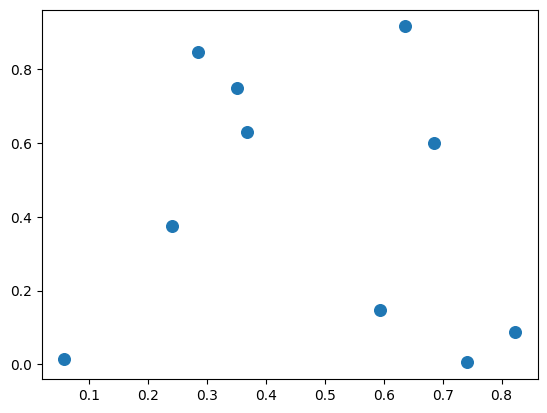

In [11]:
N=10 #nombre de villes
M=10 # dimension de la population
#les coordonnées des villes
x=np.random.uniform(0,1,N)
y=np.random.uniform(0,1,N)
chemin = np.arange(N)
plt.scatter(x,y,s=70)

calcule de la fonction fitness

In [13]:
def fitness():
  global chemin, ch
  distance =0.0
  xy = np.column_stack((x[chemin], y[chemin]))
  distance = np.sum(np.sqrt(np.sum((xy - np.roll(xy, -1, axis=0))**2, axis=1)))
  return distance

determiner une population initiale

chromosome 1  [7, 1, 4, 5, 2, 6, 8, 0, 3, 9] fitness 5.638839501531122
chromosome 2  [0, 7, 2, 5, 3, 9, 4, 1, 6, 8] fitness 6.055848570773001
chromosome 3  [9, 6, 3, 5, 4, 1, 2, 7, 0, 8] fitness 6.187481598103122
chromosome 4  [2, 0, 5, 6, 7, 9, 3, 1, 8, 4] fitness 5.016471410246647
chromosome 5  [4, 0, 1, 3, 2, 8, 7, 9, 6, 5] fitness 6.13834541908738
chromosome 6  [4, 3, 1, 0, 5, 7, 9, 2, 6, 8] fitness 4.26256305437622
chromosome 7  [2, 6, 9, 3, 4, 5, 1, 8, 0, 7] fitness 5.570297280544725
chromosome 8  [0, 2, 8, 6, 3, 4, 5, 7, 1, 9] fitness 5.975352603383801
chromosome 9  [4, 7, 5, 3, 0, 9, 1, 6, 8, 2] fitness 4.493887392290406
chromosome 10  [8, 6, 2, 1, 3, 4, 0, 9, 5, 7] fitness 5.727971149053105


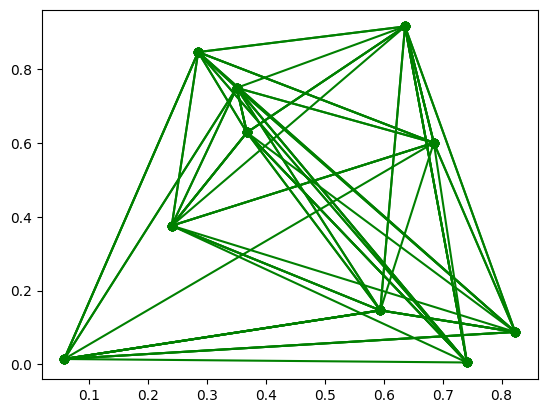

In [14]:
population = []

for i in range (0,M,1):
  population.append([0]*N)
  for j in range (0,N,1):
    h=1
    if j==0: element=rd.randint(0,N-1)
    else:
      while h==1:
        element=rd.randint(0,N-1)
        k=0
        for l in range (0,j,1):
          if population[i][l]==element:
            h=1
            k=k+1
        if k==0: h=0
    population[i][j]=element
    chemin[j]=population[i][j]
    d=fitness()
  print('chromosome', i+1,'',population[i], 'fitness', d)
  plt.plot(x[chemin], y[chemin], marker='o', color='g')


chromosome 1  [0, 1, 2, 8, 4, 5, 7, 3, 9, 6] fitness 5.40691681656384
chromosome 2  [2, 8, 5, 4, 0, 1, 9, 3, 6, 7] fitness 6.031129997007581
chromosome 3  [6, 0, 4, 1, 3, 2, 9, 7, 8, 5] fitness 7.24151351079418
chromosome 4  [9, 5, 2, 0, 4, 7, 8, 3, 1, 6] fitness 6.745790021130381
chromosome 5  [0, 3, 2, 6, 5, 9, 1, 8, 4, 7] fitness 5.548818393545997
chromosome 6  [5, 2, 3, 7, 6, 1, 8, 9, 0, 4] fitness 6.532335002124645
chromosome 7  [5, 6, 8, 4, 0, 2, 7, 9, 3, 1] fitness 5.658909050475007
chromosome 8  [0, 7, 6, 5, 9, 3, 2, 4, 8, 1] fitness 5.071161504846227
chromosome 9  [2, 4, 3, 0, 7, 1, 5, 8, 9, 6] fitness 4.376187183360171
chromosome 10  [0, 1, 7, 2, 6, 9, 3, 5, 8, 4] fitness 5.060075427639715


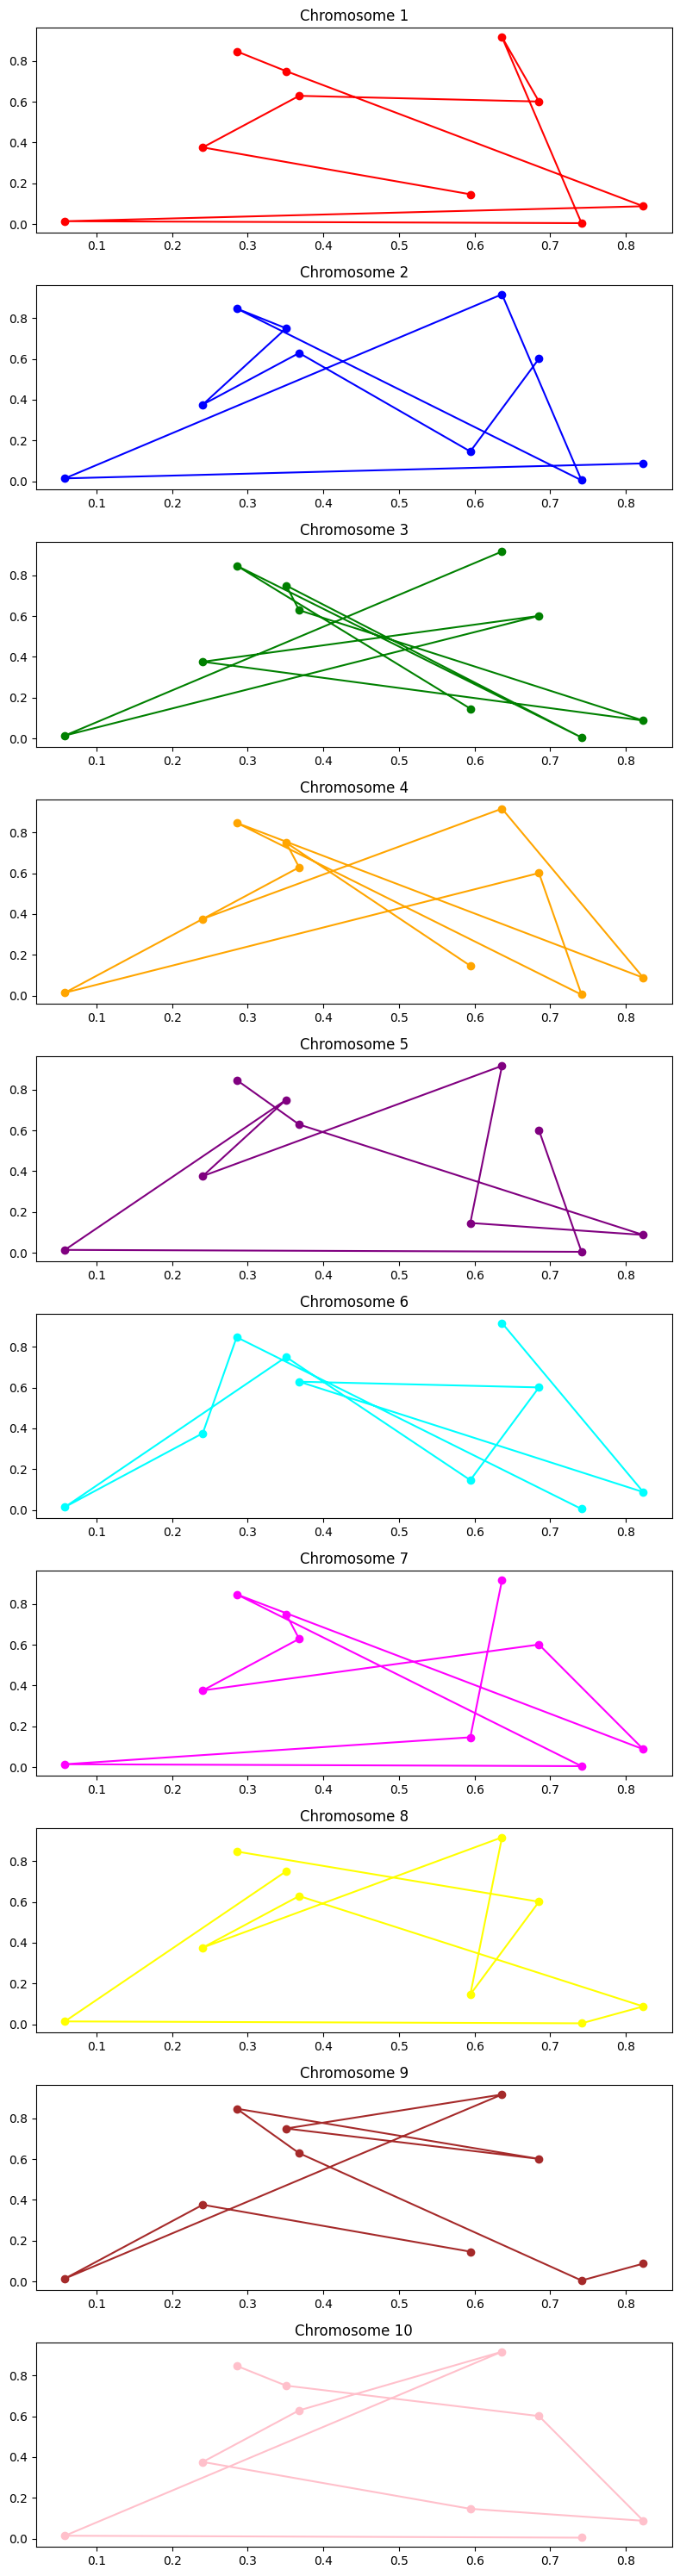

In [15]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']  # Define a list of colors
fig, axs = plt.subplots(M, 1, figsize=(8, 30))
for i in range(0, M, 1):
    population.append([0] * N)
    for j in range(0, N, 1):
        h = 1
        if j == 0:
            element = rd.randint(0, N - 1)
        else:
            while h == 1:
                element = rd.randint(0, N - 1)
                k = 0
                for l in range(0, j, 1):
                    if population[i][l] == element:
                        h = 1
                        k = k + 1
                if k == 0:
                    h = 0
        population[i][j] = element
        chemin[j] = population[i][j]
        d = fitness()

    print('chromosome', i + 1, '', population[i], 'fitness', d)


    axs[i].plot(x[chemin], y[chemin], marker='o', color=colors[i])
    axs[i].set_title(f'Chromosome {i+1}')

plt.tight_layout()
plt.show()

In [16]:
def longueur (x,y, ordre):
    i = ordre[-1]
    x0,y0 = x[i], y[i]
    d = 0
    for o in ordre:
        x1,y1 = x[o], y[o]
        d += (x0-x1)**2 + (y0-y1)**2
        x0,y0 = x1,y1
    return d

ordre = list(range(len(x)))
print("longueur initiale", longueur(x,y,ordre))


longueur initiale 4.4779607846935106


In [17]:

def permutation(x,y,ordre):
    d  = longueur(x,y,ordre)
    d0 = d+1
    it = 1
    while d < d0 :
        it += 1
        print("iteration",it, "d=",d, "ordre[0]", ordre[0])
        d0 = d
        for i in range(1,len(ordre)-1) :  # on part de 1 et plus de 0, on est sûr que le premier noeud ne bouge pas
            for j in range(i+2,len(ordre)):
                r = ordre[i:j].copy()
                r.reverse()
                ordre2 = ordre[:i] + r + ordre[j:]
                t = longueur(x,y,ordre2)
                if t < d :
                    d = t
                    ordre = ordre2
    return ordre
ordre = permutation (x,y,list(range(len(x))))
print("longueur min", longueur(x,y,ordre))

iteration 2 d= 4.4779607846935106 ordre[0] 0
iteration 3 d= 1.5863053745933444 ordre[0] 0
iteration 4 d= 1.5511505813421913 ordre[0] 0
iteration 5 d= 1.314851091064047 ordre[0] 0
iteration 6 d= 1.3101425590298243 ordre[0] 0
longueur min 1.3101425590298243


Text(0.24048075950661085, 0.37599276959624706, 'F')

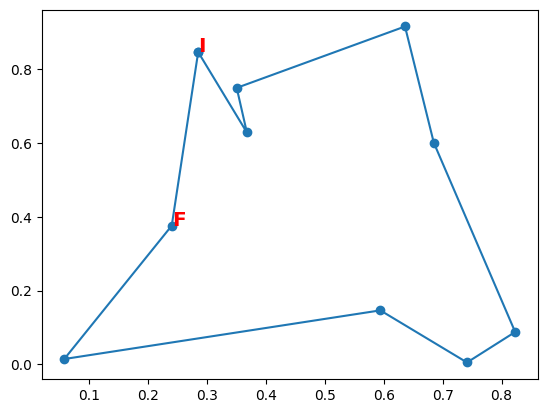

In [18]:
xo = [ x[o] for o in ordre + [ordre[0]]]
yo = [ y[o] for o in ordre + [ordre[0]]]
plt.plot(xo,yo, "o-")
plt.text(xo[0],yo[0],"I",color="r",weight="bold",size="x-large")
plt.text(xo[-2],yo[-2],"F",color="r",weight="bold",size="x-large")

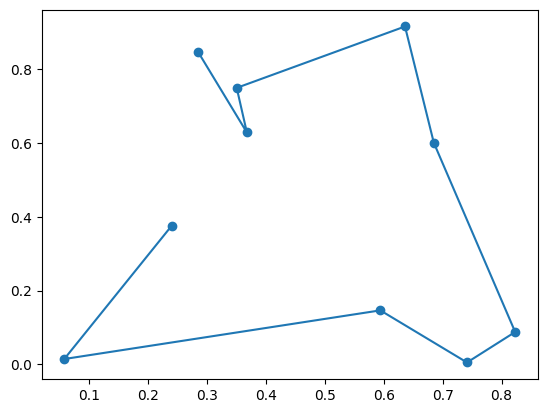

In [19]:
xo = [ x[o] for o in ordre]
yo = [ y[o] for o in ordre]
plt.plot(xo,yo, "o-")